In [ ]:
#EDA, Explatory Data Analsysi of Cars/

In [30]:
import pandas as pd
import numpy as np

In [20]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(filepath, header=0)

In [3]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [11]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [17]:
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


Through Pearson Correlation. 
1  : Perfect positive linear correlation. 
0  : Linear Correlation. the two variables most likely do not affect each other/
-1 : perfect negative linear correlation.

(0.0, 53261.231446016296)

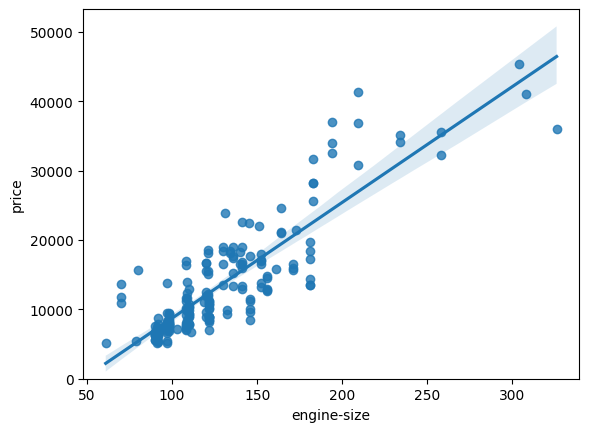

In [18]:
#Since Engine size is a int data type it can be plotted. It is visualized to see a positive correlation.
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)



In [19]:
#As shown here.
df[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


             highway-mpg     price
highway-mpg     1.000000 -0.704692
price          -0.704692  1.000000


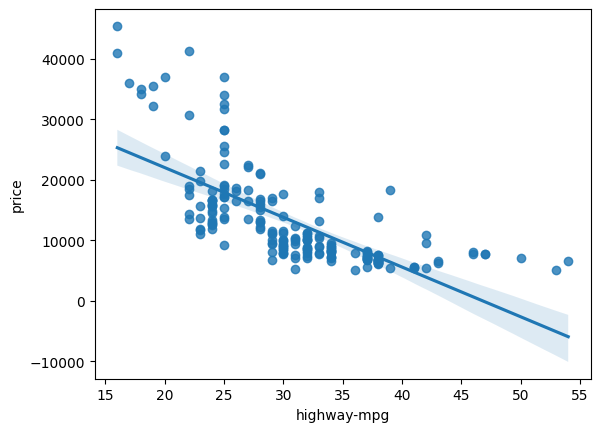

In [20]:
#This indicates a negative relationship
sns.regplot(x="highway-mpg", y="price", data=df)
print(df[['highway-mpg', 'price']].corr())

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


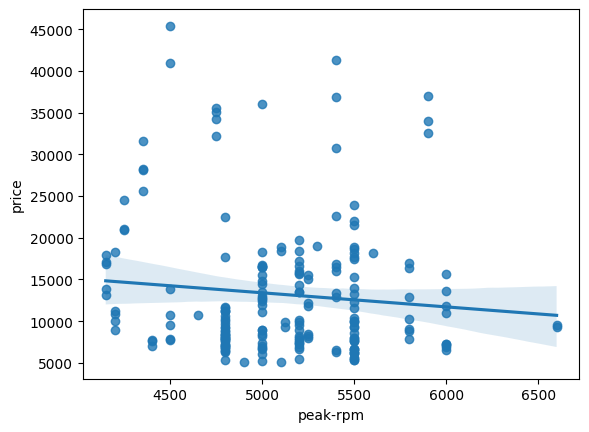

In [21]:
#Example of a weak correlation/relationship as the regression line is close to the horizontal + scattered data points.
sns.regplot(x="peak-rpm", y="price", data=df)
df[["peak-rpm","price"]].corr()

<Axes: xlabel='stroke', ylabel='price'>

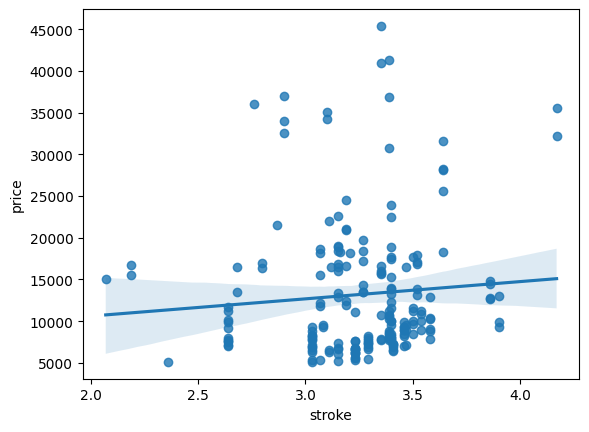

In [25]:
#More cases of weak relantionship
df[["stroke","price"]].corr()
sns.regplot(x="stroke", y="price", data=df)

<Axes: xlabel='stroke', ylabel='price'>

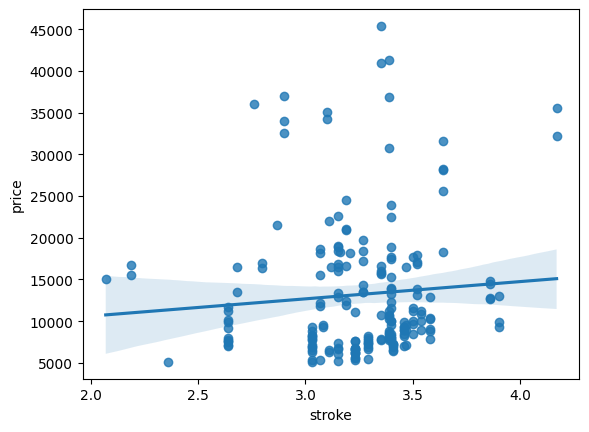

Categorical Variables.

<Axes: xlabel='body-style', ylabel='price'>

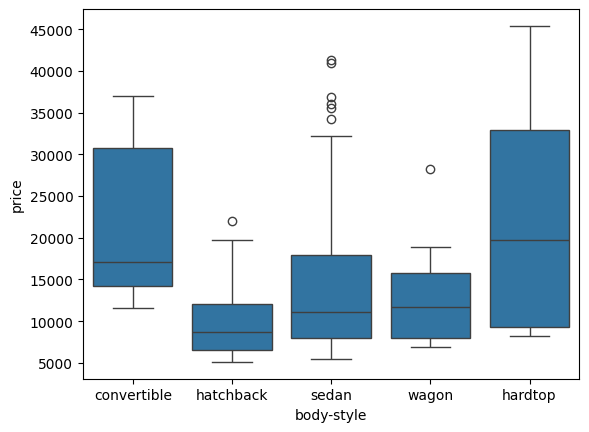

In [26]:
sns.boxplot(x="body-style", y="price", data=df)
#due to large overlap body-style is not a good predictor

<Axes: xlabel='engine-location', ylabel='price'>

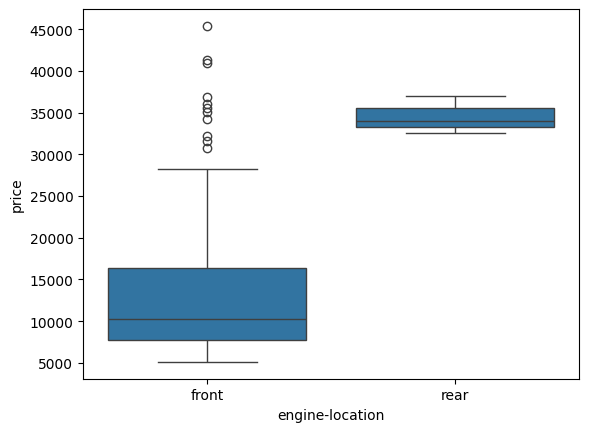

In [30]:
sns.boxplot(x="engine-location", y="price", data=df)
#this is a better example of a good predictor



<Axes: xlabel='drive-wheels', ylabel='price'>

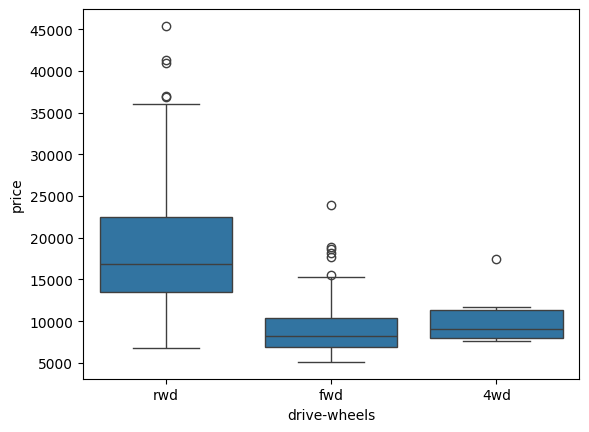

In [29]:
# drive-wheels, another potential predictor.
sns.boxplot(x="drive-wheels", y="price", data=df)

In [31]:
df.describe()
#this function will summarize all the statistical data. 

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [54]:
#Value Counts (for pandas series not Data frames)
drive_wheels_count_df = df['drive-wheels'].value_counts().to_frame()
drive_wheels_count_df.rename(columns={'count': 'value_counts'}, inplace=True)
drive_wheels_count_df.index.name = "Drive_Wheels"


In [55]:
drive_wheels_count_df.head()

,value_counts
Drive_Wheels,
fwd,118
rwd,75
4wd,8


In [56]:
# engine-location as variable, bad example of a predictor as the data will be skewed or biased.
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,count
engine-location,
front,198
rear,3


<Axes: xlabel='engine-location', ylabel='price'>

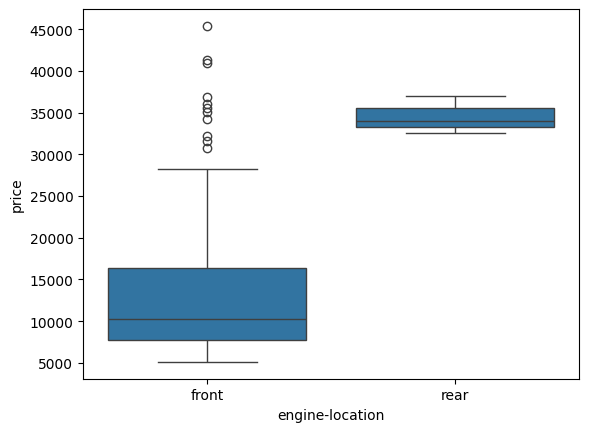

In [58]:
#The graph does not indicate the count so it is misleading figure.
sns.boxplot(x="engine-location", y="price", data=df)

In [59]:
#will list all the different categories 
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [5]:
df_group_one = df[['drive-wheels','body-style','price']]

In [16]:
df_grouped = df_group_one.groupby(['drive-wheels'], as_index=False).agg({'price': 'mean'})
df_grouped
#rwd most expensive, 4wd and fwd approx same.

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [24]:
# grouping results, another example of grouping by multiple variables.
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1


,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [26]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline 

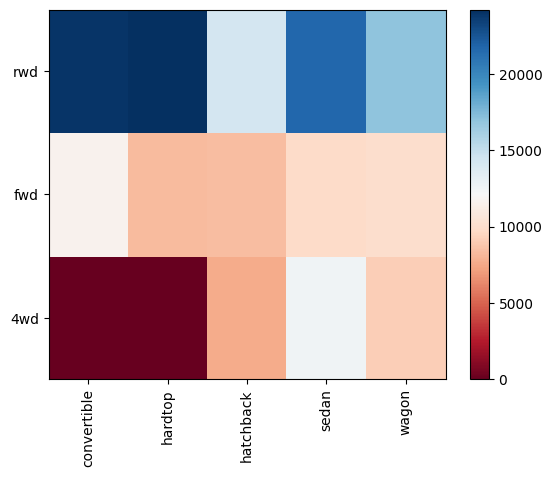

In [31]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

Difference between Pearson Correlation and P-Values.
Pearson measures the dependences, and how it is related.
P-Values measures the relationships significance. In most cases a significance level of 0.05 is used
meaning the results are 95% confident.
p-value is
0.001: we say there is strong evidence that the correlation is significant.
the p-value is
0.05: there is moderate evidence that the correlation is significant.
the p-value is
0.1: there is weak evidence that the correlation is significant.
the p-value is
0.1: there is no evidence that the correlation is significant.

In [32]:
from scipy import stats

In [60]:

df_eda = pd.DataFrame({'Category':[], 'Pearson-Coefficient':[],'P-Value':[]})

categories = ['wheel-base','horsepower','length','width','curb-weight','engine-size','bore','city-mpg','highway-mpg']

for category in categories:
    pearson_coef, p_value = stats.pearsonr(df[category], df['price'])
    print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)
    df_eda_append = pd.DataFrame.from_dict({'Category':[category], 'Pearson-Coefficient':[pearson_coef],'P-Value':[p_value]})
    df_eda = df_eda._append([df_eda_append], ignore_index=True)


The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P =  8.076488270732885e-20
The Pearson Correlation Coefficient is 0.8095745670036559  with a P-value of P =  6.369057428259557e-48
The Pearson Correlation Coefficient is 0.6906283804483639  with a P-value of P =  8.01647746615924e-30
The Pearson Correlation Coefficient is 0.7512653440522675  with a P-value of P =  9.200335510480491e-38
The Pearson Correlation Coefficient is 0.8344145257702843  with a P-value of P =  2.189577238893965e-53
The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P =  9.265491622198793e-64
The Pearson Correlation Coefficient is 0.5431553832626603  with a P-value of P =  8.049189483935315e-17
The Pearson Correlation Coefficient is -0.6865710067844678  with a P-value of P =  2.3211320655675098e-29
The Pearson Correlation Coefficient is -0.7046922650589529  with a P-value of P =  1.7495471144476463e-31


In [61]:
df_eda.head(10)

,Category,Pearson-Coefficient,P-Value
0,wheel-base,0.584642,8.076488e-20
1,horsepower,0.809575,6.369057e-48
2,length,0.690628,8.016477e-30
3,width,0.751265,9.200336e-38
4,curb-weight,0.834415,2.189577e-53
5,engine-size,0.872335,9.265492e-64
6,bore,0.543155,8.049189e-17
7,city-mpg,-0.686571,2.321132e-29
8,highway-mpg,-0.704692,1.749547e-31


In [68]:
df_eda.sort_values(by='Pearson-Coefficient',ascending=False, inplace=True)

In [69]:
df_eda

,Category,Pearson-Coefficient,P-Value
5,engine-size,0.872335,9.265492e-64
4,curb-weight,0.834415,2.189577e-53
1,horsepower,0.809575,6.369057e-48
3,width,0.751265,9.200336e-38
2,length,0.690628,8.016477e-30
0,wheel-base,0.584642,8.076488e-20
6,bore,0.543155,8.049189e-17
7,city-mpg,-0.686571,2.321132e-29
8,highway-mpg,-0.704692,1.749547e-31
